# 피파 이적료 예측

## 패키지 

In [122]:
import pandas as pd
import numpy as np 
from scipy.stats import norm,skew
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
train = pd.read_csv('FIFA_train.csv',encoding='UTF-8')
test = pd.read_csv('FIFA_test.csv',encoding='UTF-8')
submission = pd.read_csv('FIFA_sub.csv',encoding='UTF-8')

In [124]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [125]:
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


## 결측치 확인 

In [126]:
train.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [127]:
test.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
dtype: int64

### 기술통계

In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [129]:
num_col = ['age','stat_overall','stat_potential']
cat_col = ['continent','reputation','contract_until','position','prefer_foot','stat_skill_moves']

In [130]:
train.loc[:,cat_col]

,continent,reputation,contract_until,position,prefer_foot,stat_skill_moves
0,south america,5.0,2021,ST,left,4.0
1,europe,4.0,2020,GK,right,1.0
2,south america,5.0,2021,ST,right,3.0
3,europe,4.0,2020,DF,right,3.0
4,europe,3.0,2021,GK,right,1.0
...,...,...,...,...,...,...
8927,africa,1.0,2019,MF,right,3.0
8928,europe,1.0,2020,DF,right,2.0
8929,south america,1.0,2021,DF,right,2.0
8930,europe,1.0,2021,GK,right,1.0


In [131]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   int64  
 3   continent         3828 non-null   object 
 4   contract_until    3828 non-null   object 
 5   position          3828 non-null   object 
 6   prefer_foot       3828 non-null   object 
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   int64  
 9   stat_potential    3828 non-null   int64  
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 329.1+ KB


In [132]:
train.loc[:,num_col].describe()

,age,stat_overall,stat_potential
count,8932.000000,8932.000000,8932.000000
mean,25.209136,67.091133,71.997201
std,4.635515,6.854910,5.988147
min,16.000000,47.000000,48.000000
25%,21.000000,63.000000,68.000000
50%,25.000000,67.000000,72.000000
75%,28.000000,72.000000,76.000000
max,40.000000,94.000000,94.000000


In [133]:
train.loc[:,cat_col].describe(include="object")

,continent,contract_until,position,prefer_foot
count,8932,8932,8932,8932
unique,5,17,4,2
top,europe,2019,MF,right
freq,5322,2366,3428,6837


In [134]:
train.loc[:,'continent'].value_counts()

continent
europe           5322
south america    1927
asia              787
africa            721
oceania           175
Name: count, dtype: int64

In [135]:
train.loc[:,'position'].value_counts()

position
MF    3428
DF    2791
ST    1705
GK    1008
Name: count, dtype: int64

In [136]:
train.loc[:,'contract_until'].value_counts()

contract_until
2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: count, dtype: int64

In [137]:
train.loc[:,'prefer_foot'].value_counts()

prefer_foot
right    6837
left     2095
Name: count, dtype: int64

### 필요없는 열 제거 



In [138]:
train = train.drop(['name','id'],axis=1)
test = test.drop(['name','id'],axis=1)



In [139]:
train.columns

Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
       'value'],
      dtype='object')

In [140]:
test.columns

Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves'],
      dtype='object')

### 데이터 분포 확인 

이산형 자료 : ['continent', 'position', 'prefer_foot', 'reputation','stat_skill_moves' ]

연속형 자료 : ['age', 'stat_overall','stat_potential']



In [141]:
num_col

['age', 'stat_overall', 'stat_potential']

<Axes: xlabel='stat_potential', ylabel='Count'>

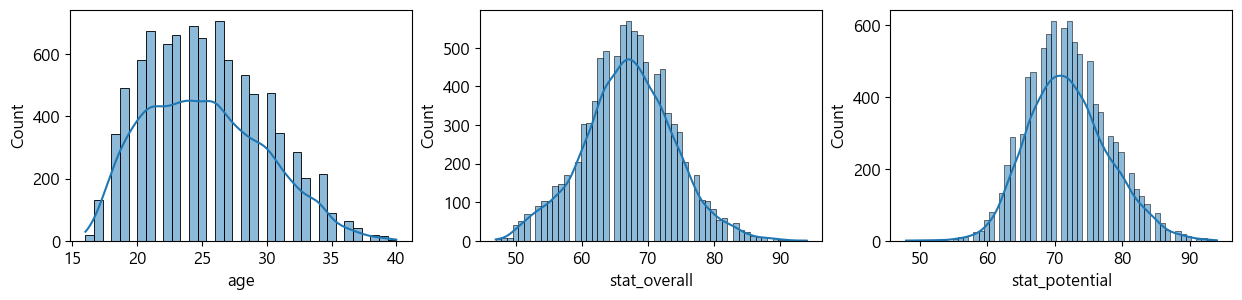

In [142]:
f, ax = plt.subplots(1,len(num_col),figsize=(15,3))
## 나이 히스토그램
sns.histplot(data = train,x='age',ax=ax[0],kde=True)
## 오버롤 히스토그램
sns.histplot(data = train,x='stat_overall',ax=ax[1],kde=True)
## 잠재력 히스토그램
sns.histplot(data = train,x='stat_potential',ax=ax[2],kde=True)



In [143]:
cat_col

['continent',
 'reputation',
 'contract_until',
 'position',
 'prefer_foot',
 'stat_skill_moves']

C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


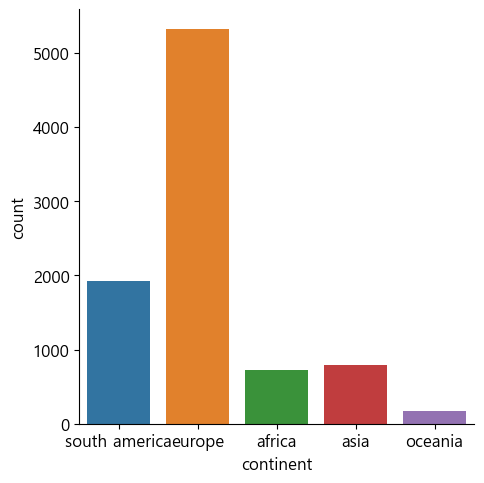

In [144]:

## 선수들의 출신 지역 
sns.catplot(data=train,x='continent',kind='count')
## 유럽이 제일 많고 그다음이 남미

C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


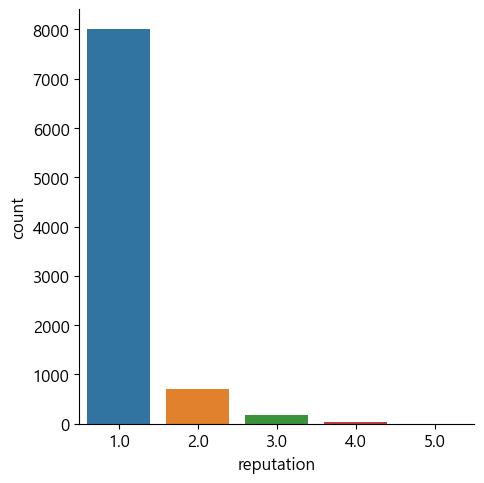

In [145]:

## 선수들의 평판 분포
sns.catplot(data=train,x='reputation',kind='count')
## 평판이 1인 선수들이 압도적으로 많다


C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


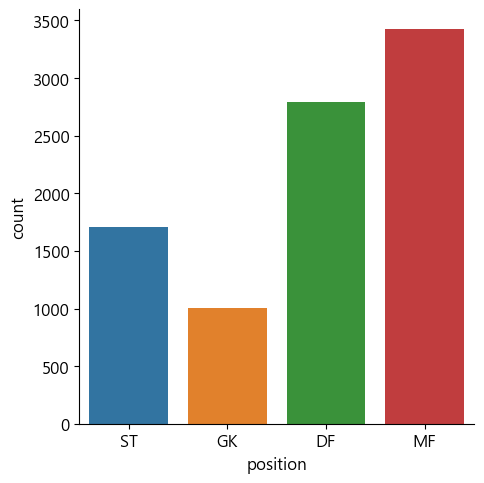

In [146]:

## 포지션 분포
sns.catplot(data=train,x='position',kind='count')

## 미드필더가 제일 많고 그다음은 수비수

C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


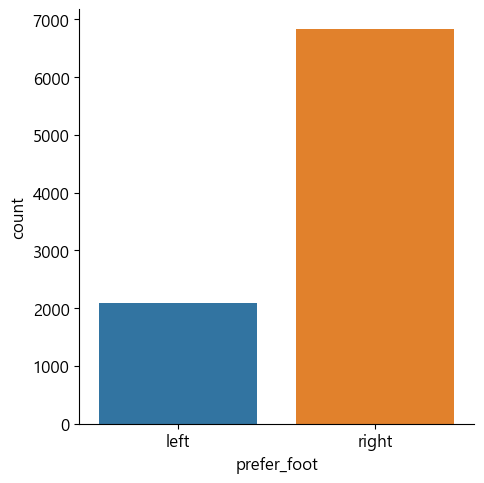

In [147]:

## 주발 선호
sns.catplot(data=train,x='prefer_foot',kind='count')
## 오른발잡이가 압도적으로 많다

C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


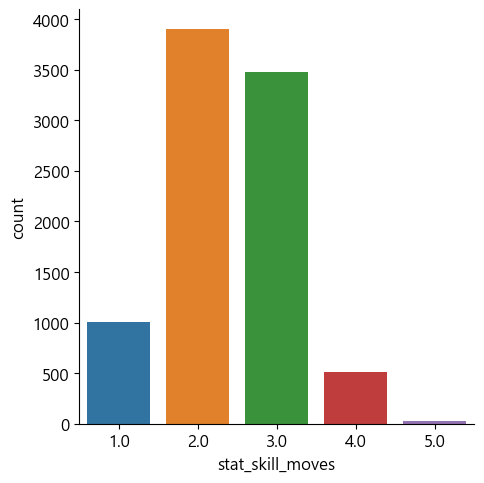

In [148]:

## 개인기 능력치
sns.catplot(data=train,x='stat_skill_moves',kind='count')

## 보통 2~3성이다 .

In [149]:
num_col

['age', 'stat_overall', 'stat_potential']

### 상관관계 확인

In [150]:
train.columns

Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
       'value'],
      dtype='object')

In [151]:
corr_col = ['age','reputation','stat_overall','stat_potential','stat_skill_moves','value']

<Axes: >

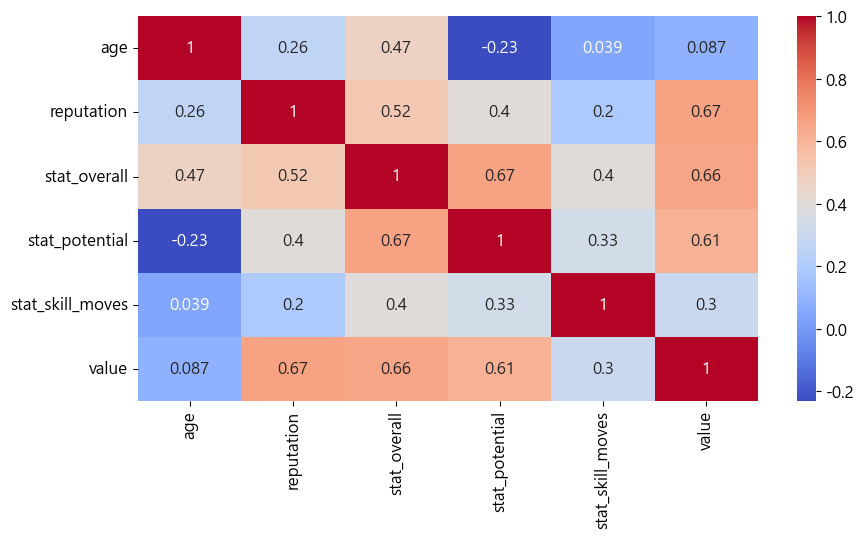

In [152]:
sns.heatmap(train.loc[:,corr_col].corr(),cmap='coolwarm',annot=True)

In [153]:
high_corr = ['reputation','stat_overall','stat_potential']
train.loc[:,corr_col].corr()


,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
age,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319
reputation,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500
value,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000


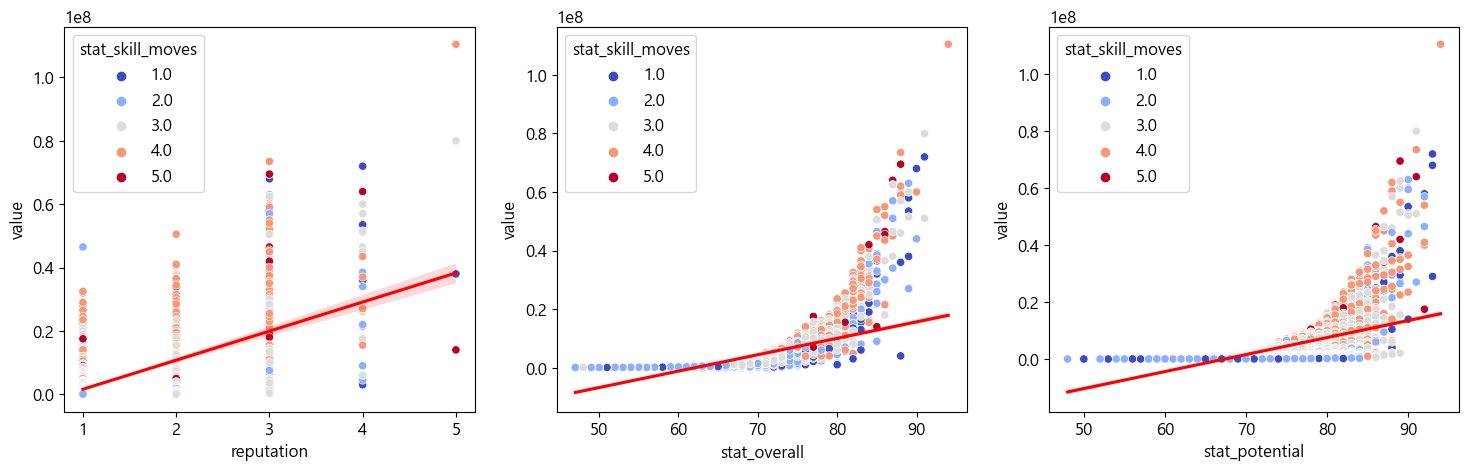

In [154]:
## 능력치와 평판, 잠재력에 따른 이적료 분포와 회귀선을 나타냄 (개인기 능력치에 따라)

f,ax = plt.subplots(1,len(high_corr),figsize=(18,5))

for col, ax in zip(high_corr,ax):
    sns.scatterplot(data=train,x=col,y='value',ax=ax,hue='stat_skill_moves',palette='coolwarm')
    sns.regplot(data=train,x=col,y='value',ax=ax,marker='',color='red')

plt.show()

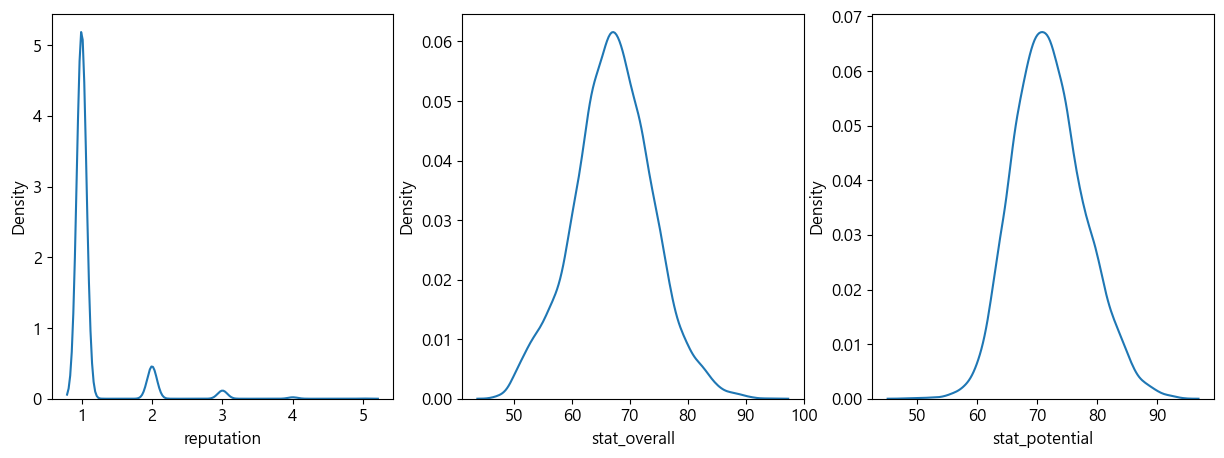

In [155]:
## 능력치와 평판, 잠재력의 밀도함수 그래스

f,ax = plt.subplots(1,len(high_corr),figsize=(15,5))

for col,ax in zip(high_corr,ax):
    sns.kdeplot(data=train,x=col,ax=ax)

In [156]:
train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


### 나이를 범주화 시켜보자

In [157]:
train['age_range'] = train['age']
train.loc[train['age']<20,'age_range'] = '20세이하'
train.loc[(train['age']>=20)&(train['age']<26),'age_range'] = '20~26세'
train.loc[(train['age']>=26)&(train['age']<32),'age_range'] = '26~32세'
train.loc[(train['age']>=32)&(train['age']<38),'age_range'] = '32~38세'
train.loc[(train['age']>=38),'age_range'] = '38세 이상'
train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,age_range
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,26~32세
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,26~32세
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,26~32세
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,32~38세
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,20~26세


능력치 + 잠재력 달성한 비율을 파생변수로 만들어보기


In [158]:
train['ratio'] = train['stat_overall']/train['stat_potential']


In [159]:
num_col = ['age', 'stat_overall', 'stat_potential','ratio']

### 로그화 ㄱㄱ 

In [160]:
train['log_age'] = np.log1p(train.loc[:,'age'])
train['log_stat_overall'] = np.log1p(train.loc[:,'stat_overall'])
train['log_stat_potential'] = np.log1p(train.loc[:,'stat_potential'])
train['log_ratio'] = np.log1p(train.loc[:,'ratio'])
train['log_value'] = np.log1p(train['value'])



In [161]:
train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,age_range,ratio,log_age,log_stat_overall,log_stat_potential,log_ratio,log_value
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,26~32세,1.000000,3.465736,4.553877,4.553877,0.693147,18.520526
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,26~32세,0.978495,3.332205,4.521789,4.543295,0.682336,18.092177
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,26~32세,1.000000,3.465736,4.521789,4.521789,0.693147,18.197537
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,32~38세,1.000000,3.496508,4.521789,4.521789,0.693147,17.747336
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,20~26세,0.967742,3.258097,4.510860,4.543295,0.676887,18.035018


<Axes: xlabel='age', ylabel='value'>

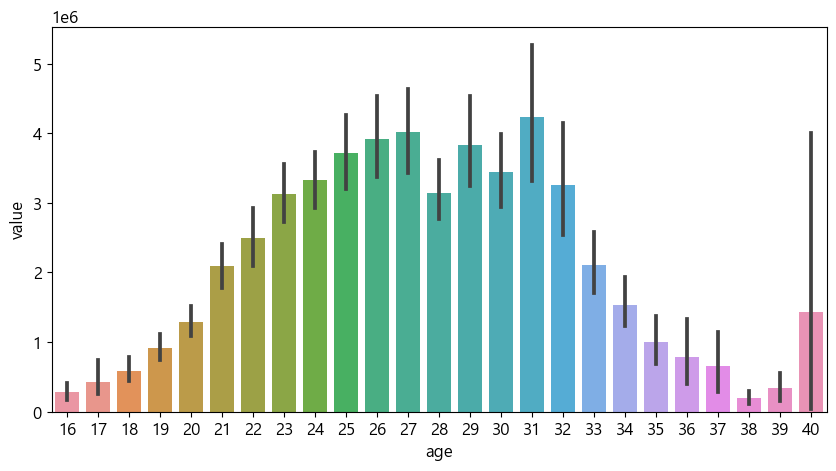

In [162]:
sns.barplot(x='age',y='value',data=train)

### 현재 오버롤, 잠재오버롤 


In [163]:
train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,age_range,ratio,log_age,log_stat_overall,log_stat_potential,log_ratio,log_value
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,26~32세,1.000000,3.465736,4.553877,4.553877,0.693147,18.520526
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,26~32세,0.978495,3.332205,4.521789,4.543295,0.682336,18.092177
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,26~32세,1.000000,3.465736,4.521789,4.521789,0.693147,18.197537
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,32~38세,1.000000,3.496508,4.521789,4.521789,0.693147,17.747336
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,20~26세,0.967742,3.258097,4.510860,4.543295,0.676887,18.035018


In [164]:
import sys
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

stat_overall의 범위 :  47


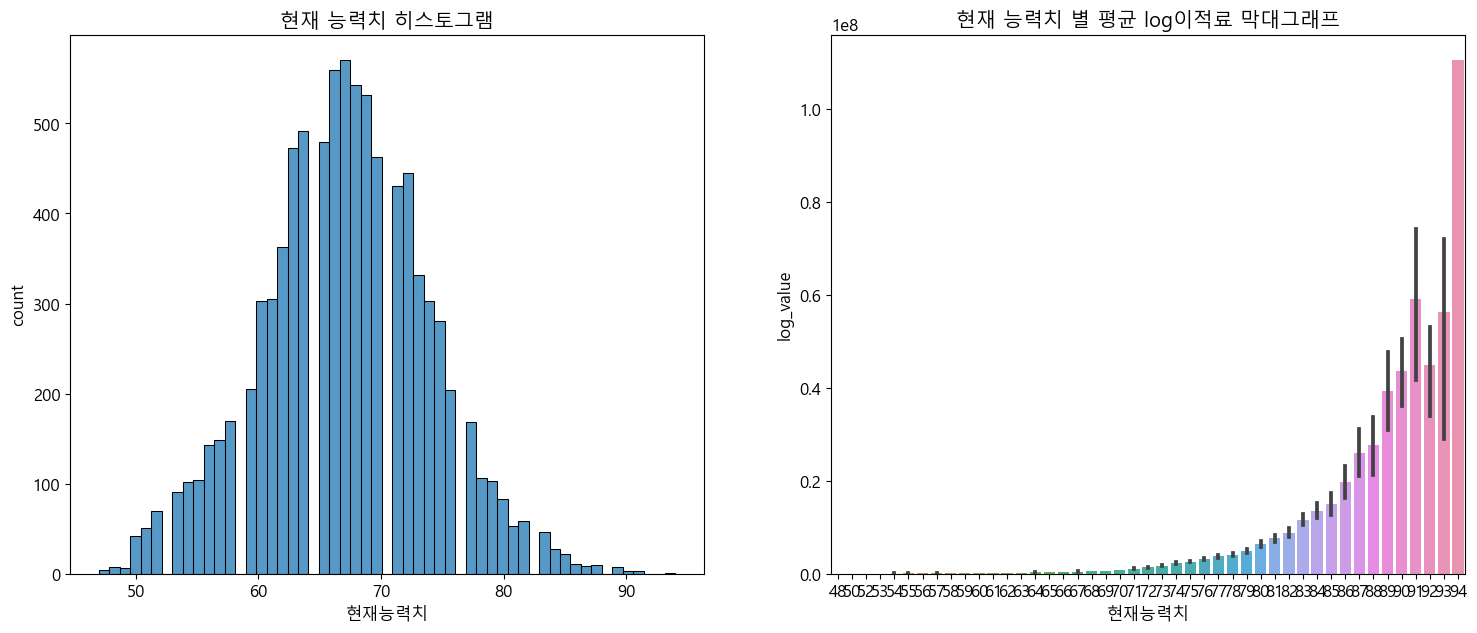

In [165]:
f , axes = plt.subplots(1,2)
axes = axes.flatten()
f.set_size_inches(18,7)

print("stat_overall의 범위 : " ,np.ptp(train["stat_overall"])) # 범위

# 히스토그램
sns.histplot(x="stat_overall", data=train, ax=axes[0])
axes[0].set(title = "현재 능력치 히스토그램",
      xlabel="현재능력치",
      ylabel="count")

sns.barplot(x="stat_potential", y="value", data=train,ax=axes[1])
axes[1].set(title = "현재 능력치 별 평균 log이적료 막대그래프",
      xlabel="현재능력치",
      ylabel="log_value")

plt.show()

stat_overall의 범위 :  46


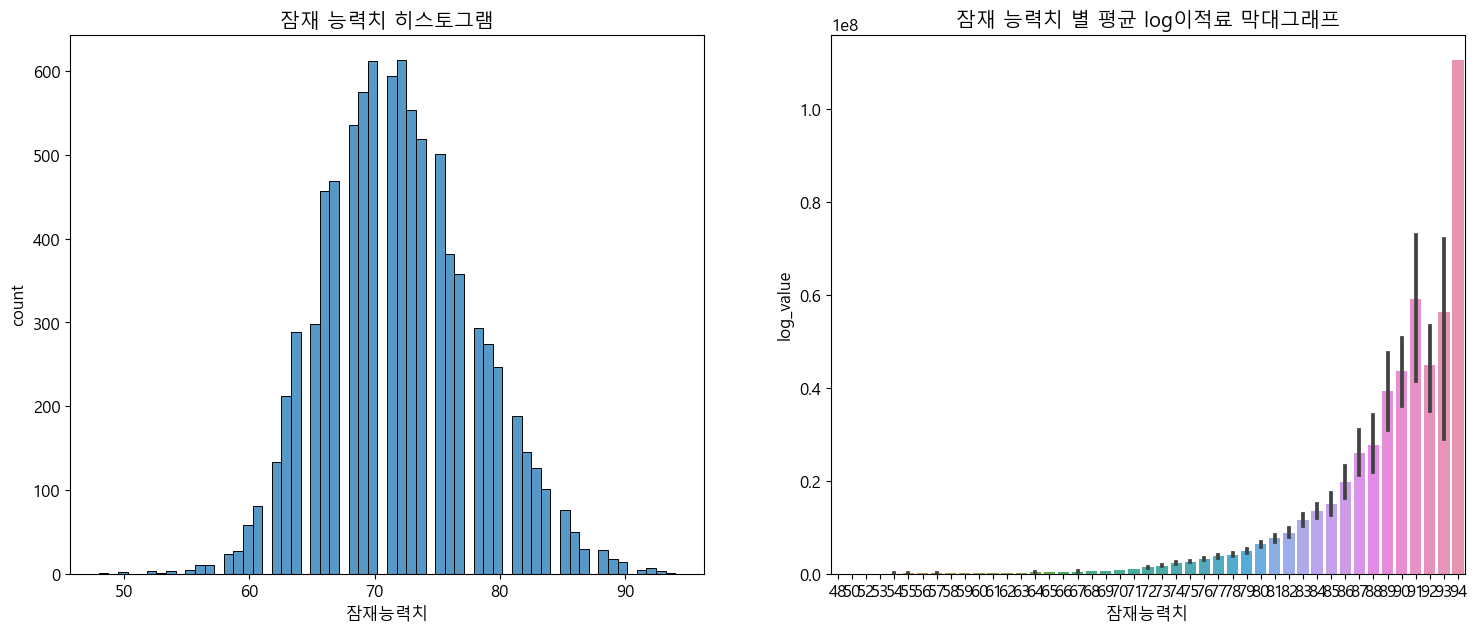

In [166]:
f , axes = plt.subplots(1,2)
axes = axes.flatten()
f.set_size_inches(18,7)

print("stat_overall의 범위 : " ,np.ptp(train["stat_potential"])) # 범위

# 히스토그램
sns.histplot(x="stat_potential", data=train, ax=axes[0])
axes[0].set(title = "잠재 능력치 히스토그램",
      xlabel="잠재능력치",
      ylabel="count")

sns.barplot(x="stat_potential", y="value", data=train,ax=axes[1])
axes[1].set(title = "잠재 능력치 별 평균 log이적료 막대그래프",
      xlabel="잠재능력치",
      ylabel="log_value")

plt.show()

stat_overall의 범위 :  0.3246753246753247


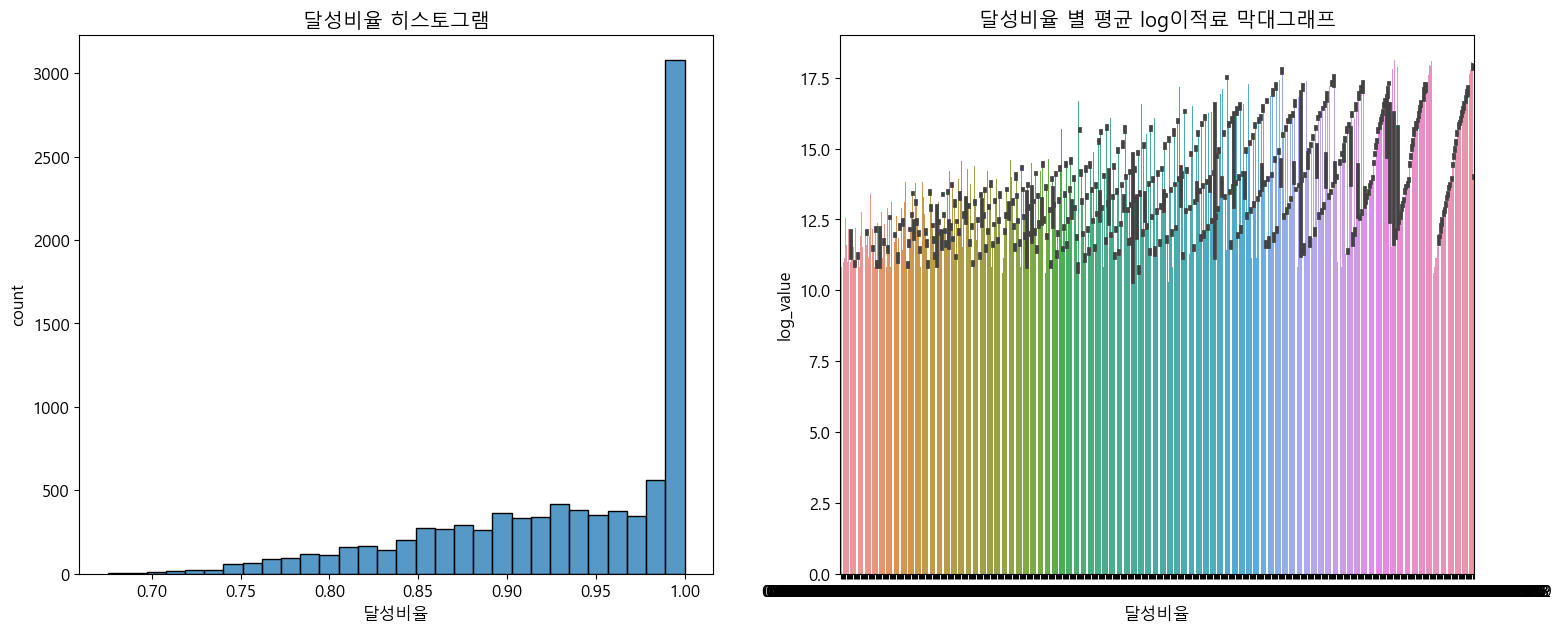

In [167]:
f , axes = plt.subplots(1,2)
axes = axes.flatten()
f.set_size_inches(18,7)

print("stat_overall의 범위 : " ,np.ptp(train["ratio"])) # 범위

# 히스토그램
sns.histplot(x="ratio", data=train, ax=axes[0])
axes[0].set(title = "달성비율 히스토그램",
      xlabel="달성비율",
      ylabel="count")

sns.barplot(x="ratio", y="log_value", data=train,ax=axes[1])
axes[1].set(title = "달성비율 별 평균 log이적료 막대그래프",
      xlabel="달성비율",
      ylabel="log_value")

plt.show()

In [168]:
train.loc[:,['age','log_age','log_stat_overall','stat_overall','stat_potential','log_stat_potential','log_ratio','ratio','value']].corr()

,age,log_age,log_stat_overall,stat_overall,stat_potential,log_stat_potential,log_ratio,ratio,value
age,1.000000,0.995082,0.478299,0.467345,-0.231303,-0.231568,0.862191,0.867525,0.087319
log_age,0.995082,1.000000,0.504836,0.492412,-0.233217,-0.233393,0.897214,0.901576,0.102586
log_stat_overall,0.478299,0.504836,1.000000,0.997311,0.649352,0.649121,0.616119,0.613936,0.615644
stat_overall,0.467345,0.492412,0.997311,1.000000,0.665453,0.663204,0.598508,0.596732,0.658444
stat_potential,-0.231303,-0.233217,0.649352,0.665453,1.000000,0.998325,-0.196939,-0.199026,0.611907
log_stat_potential,-0.231568,-0.233393,0.649121,0.663204,0.998325,1.000000,-0.198961,-0.201031,0.585162
log_ratio,0.862191,0.897214,0.616119,0.598508,-0.196939,-0.198961,1.000000,0.999796,0.188040
ratio,0.867525,0.901576,0.613936,0.596732,-0.199026,-0.201031,0.999796,1.000000,0.187391
value,0.087319,0.102586,0.615644,0.658444,0.611907,0.585162,0.188040,0.187391,1.000000


In [169]:
train.loc[:,['log_stat_overall','stat_overall','stat_potential','log_stat_potential','log_ratio','ratio']].corr()

,log_stat_overall,stat_overall,stat_potential,log_stat_potential,log_ratio,ratio
log_stat_overall,1.000000,0.997311,0.649352,0.649121,0.616119,0.613936
stat_overall,0.997311,1.000000,0.665453,0.663204,0.598508,0.596732
stat_potential,0.649352,0.665453,1.000000,0.998325,-0.196939,-0.199026
log_stat_potential,0.649121,0.663204,0.998325,1.000000,-0.198961,-0.201031
log_ratio,0.616119,0.598508,-0.196939,-0.198961,1.000000,0.999796
ratio,0.613936,0.596732,-0.199026,-0.201031,0.999796,1.000000


독립변수 선정


log_stat_overall, log_stat_potential ,log_ratio

In [170]:
num_final_col = ['log_stat_overall','log_stat_potential','log_ratio']

In [171]:
train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,age_range,ratio,log_age,log_stat_overall,log_stat_potential,log_ratio,log_value
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,26~32세,1.000000,3.465736,4.553877,4.553877,0.693147,18.520526
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,26~32세,0.978495,3.332205,4.521789,4.543295,0.682336,18.092177
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,26~32세,1.000000,3.465736,4.521789,4.521789,0.693147,18.197537
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,32~38세,1.000000,3.496508,4.521789,4.521789,0.693147,17.747336
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,20~26세,0.967742,3.258097,4.510860,4.543295,0.676887,18.035018


In [172]:
train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,age_range,ratio,log_age,log_stat_overall,log_stat_potential,log_ratio,log_value
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,26~32세,1.000000,3.465736,4.553877,4.553877,0.693147,18.520526
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,26~32세,0.978495,3.332205,4.521789,4.543295,0.682336,18.092177
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,26~32세,1.000000,3.465736,4.521789,4.521789,0.693147,18.197537
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,32~38세,1.000000,3.496508,4.521789,4.521789,0.693147,17.747336
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,20~26세,0.967742,3.258097,4.510860,4.543295,0.676887,18.035018


In [173]:
## 종속변수는 value
## 연속형에서는 log_stat_overall, log_stat_potential
train=train.drop(['age','stat_overall','stat_potential','log_value','ratio','log_age'],axis=1)
train.head()

,continent,contract_until,position,prefer_foot,reputation,stat_skill_moves,value,age_range,log_stat_overall,log_stat_potential,log_ratio
0,south america,2021,ST,left,5.0,4.0,110500000.0,26~32세,4.553877,4.553877,0.693147
1,europe,2020,GK,right,4.0,1.0,72000000.0,26~32세,4.521789,4.543295,0.682336
2,south america,2021,ST,right,5.0,3.0,80000000.0,26~32세,4.521789,4.521789,0.693147
3,europe,2020,DF,right,4.0,3.0,51000000.0,32~38세,4.521789,4.521789,0.693147
4,europe,2021,GK,right,3.0,1.0,68000000.0,20~26세,4.510860,4.543295,0.676887


In [174]:
num_final_col

['log_stat_overall', 'log_stat_potential', 'log_ratio']

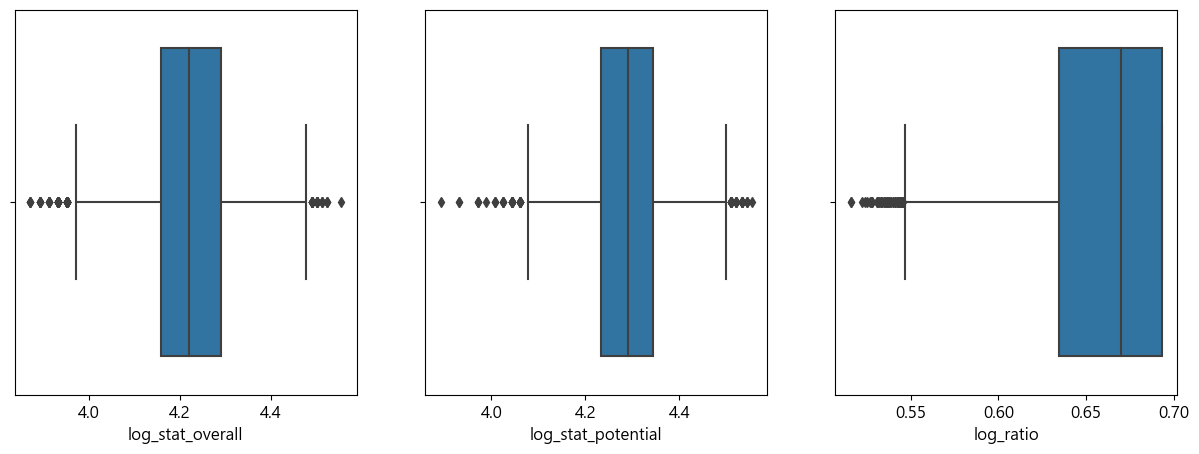

In [175]:
### 연속형변수 박스플롯
f,ax = plt.subplots(1,len(num_final_col),figsize=(15,5))
for col,ax in zip(num_final_col,ax):
    sns.boxplot(data=train,x=col,ax=ax)
    
    

In [176]:
len(train.loc[(train['log_stat_overall']<4) | (train['log_stat_overall']>4.45),:])

337

In [177]:
len(train.loc[(train['log_stat_potential']<4.05) | (train['log_stat_potential']>4.46),:])

180

In [178]:
len(train.loc[(train['log_ratio']<0.55)])

67

### 이상치 제거 
log_stat_overall


In [179]:
overall_first = train['log_stat_overall'].quantile(0.25)
overall_third = train['log_stat_overall'].quantile(0.75)
IQR_ov = overall_third - overall_first
train = train.loc[(train['log_stat_overall']>=overall_first - 1.5 *IQR_ov) &(train['log_stat_overall']<=overall_third + 1.5 *IQR_ov),:]
train

,continent,contract_until,position,prefer_foot,reputation,stat_skill_moves,value,age_range,log_stat_overall,log_stat_potential,log_ratio
24,europe,2023,DF,left,3.0,2.0,57000000.0,20~26세,4.477337,4.532599,0.665597
25,africa,2021,DF,right,3.0,2.0,51000000.0,26~32세,4.477337,4.510860,0.676340
26,europe,2021,MF,right,4.0,5.0,64000000.0,20~26세,4.477337,4.521789,0.670924
27,europe,2022,ST,left,3.0,3.0,62500000.0,20~26세,4.477337,4.499810,0.681848
28,europe,2020,DF,left,3.0,3.0,38000000.0,26~32세,4.477337,4.477337,0.693147
...,...,...,...,...,...,...,...,...,...,...,...
8817,africa,2019,GK,right,1.0,1.0,60000.0,20~26세,3.970292,4.110874,0.624154
8818,europe,2021,MF,right,1.0,2.0,100000.0,20세이하,3.970292,4.290459,0.543615
8819,europe,2019,GK,right,1.0,1.0,80000.0,20세이하,3.970292,4.204693,0.581030
8820,europe,2023,MF,right,1.0,2.0,90000.0,20세이하,3.970292,4.262680,0.555526


log_stat_potential

In [180]:
po_overall_first = train['log_stat_potential'].quantile(0.25)
po_overall_third = train['log_stat_potential'].quantile(0.75)
IQR_po = po_overall_third - po_overall_first
train = train.loc[(train['log_stat_potential']>=po_overall_first - 1.5 *IQR_po) &(train['log_stat_potential']<=po_overall_third + 1.5 *IQR_po),:]
train


,continent,contract_until,position,prefer_foot,reputation,stat_skill_moves,value,age_range,log_stat_overall,log_stat_potential,log_ratio
27,europe,2022,ST,left,3.0,3.0,62500000.0,20~26세,4.477337,4.499810,0.681848
28,europe,2020,DF,left,3.0,3.0,38000000.0,26~32세,4.477337,4.477337,0.693147
29,europe,2020,ST,right,3.0,4.0,45000000.0,26~32세,4.477337,4.477337,0.693147
30,europe,2020,MF,right,3.0,3.0,46500000.0,26~32세,4.477337,4.477337,0.693147
31,europe,2021,MF,right,4.0,3.0,46500000.0,26~32세,4.477337,4.477337,0.693147
...,...,...,...,...,...,...,...,...,...,...,...
8817,africa,2019,GK,right,1.0,1.0,60000.0,20~26세,3.970292,4.110874,0.624154
8818,europe,2021,MF,right,1.0,2.0,100000.0,20세이하,3.970292,4.290459,0.543615
8819,europe,2019,GK,right,1.0,1.0,80000.0,20세이하,3.970292,4.204693,0.581030
8820,europe,2023,MF,right,1.0,2.0,90000.0,20세이하,3.970292,4.262680,0.555526


ratio

In [181]:
ratio_first = train['log_ratio'].quantile(0.25)
ratio_third = train['log_ratio'].quantile(0.75)

IQR_ratio = ratio_third - ratio_first
train = train.loc[(train['log_ratio']>=ratio_first - 1.5 *IQR_ratio) &(train['log_ratio']<=ratio_third + 1.5 *IQR_ratio),:]
train

,continent,contract_until,position,prefer_foot,reputation,stat_skill_moves,value,age_range,log_stat_overall,log_stat_potential,log_ratio
27,europe,2022,ST,left,3.0,3.0,62500000.0,20~26세,4.477337,4.499810,0.681848
28,europe,2020,DF,left,3.0,3.0,38000000.0,26~32세,4.477337,4.477337,0.693147
29,europe,2020,ST,right,3.0,4.0,45000000.0,26~32세,4.477337,4.477337,0.693147
30,europe,2020,MF,right,3.0,3.0,46500000.0,26~32세,4.477337,4.477337,0.693147
31,europe,2021,MF,right,4.0,3.0,46500000.0,26~32세,4.477337,4.477337,0.693147
...,...,...,...,...,...,...,...,...,...,...,...
8816,europe,2020,MF,left,1.0,2.0,90000.0,20~26세,3.970292,4.158883,0.601797
8817,africa,2019,GK,right,1.0,1.0,60000.0,20~26세,3.970292,4.110874,0.624154
8819,europe,2019,GK,right,1.0,1.0,80000.0,20세이하,3.970292,4.204693,0.581030
8820,europe,2023,MF,right,1.0,2.0,90000.0,20세이하,3.970292,4.262680,0.555526


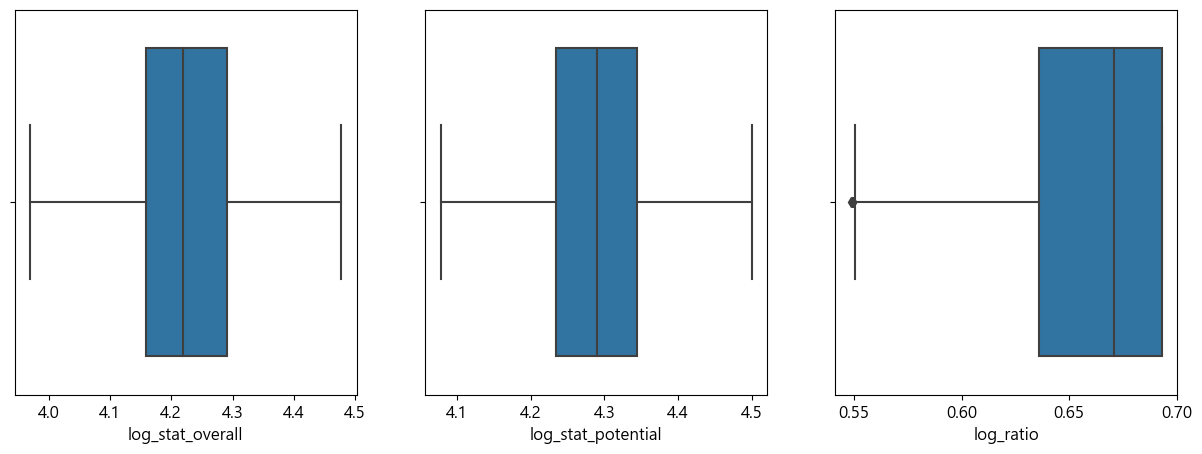

In [182]:
### 연속형변수 박스플롯
f,ax = plt.subplots(1,len(num_final_col),figsize=(15,5))
for col,ax in zip(num_final_col,ax):
    sns.boxplot(data=train,x=col,ax=ax)
    

### 개인기와 능력치의 상관관계 

<Axes: xlabel='stat_skill_moves', ylabel='value'>

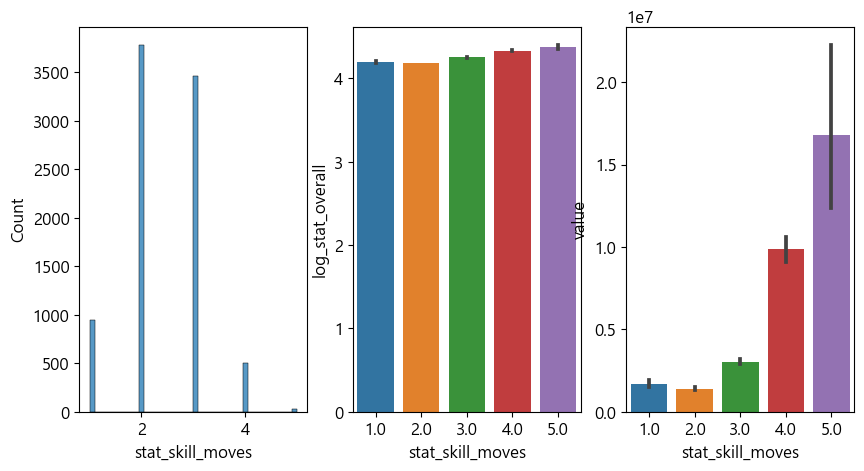

In [183]:
fig,ax=plt.subplots(1,3)
sns.histplot(x='stat_skill_moves',data=train,ax=ax[0])
sns.barplot(x='stat_skill_moves',data=train,y='log_stat_overall',ax=ax[1])
sns.barplot(x='stat_skill_moves',data=train,y='value',ax=ax[2])


In [184]:
train.head()

,continent,contract_until,position,prefer_foot,reputation,stat_skill_moves,value,age_range,log_stat_overall,log_stat_potential,log_ratio
27,europe,2022,ST,left,3.0,3.0,62500000.0,20~26세,4.477337,4.499810,0.681848
28,europe,2020,DF,left,3.0,3.0,38000000.0,26~32세,4.477337,4.477337,0.693147
29,europe,2020,ST,right,3.0,4.0,45000000.0,26~32세,4.477337,4.477337,0.693147
30,europe,2020,MF,right,3.0,3.0,46500000.0,26~32세,4.477337,4.477337,0.693147
31,europe,2021,MF,right,4.0,3.0,46500000.0,26~32세,4.477337,4.477337,0.693147


### 대륙

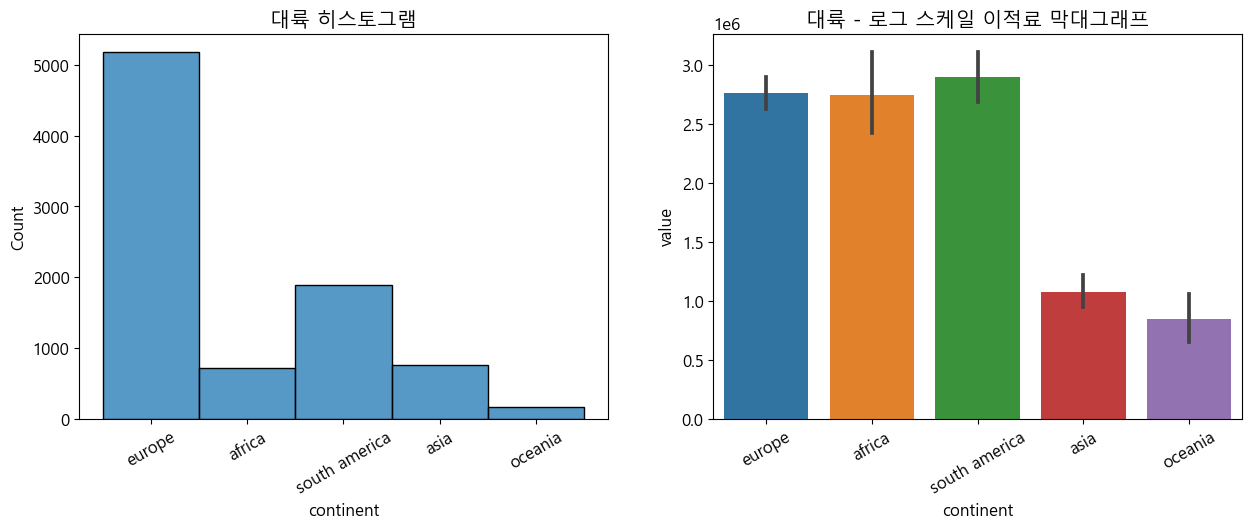

In [185]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

sns.histplot(x='continent',data=train,ax=ax[0])
ax[0].set(title = "대륙 히스토그램")
ax[0].tick_params(axis='x',labelrotation = 30)

sns.barplot(x='continent',data=train,y='value',ax=ax[1])
ax[1].set(title = "대륙 - 로그 스케일 이적료 막대그래프")
ax[1].tick_params(axis='x',labelrotation = 30)


### 계약만료기간
- 6월 5월 -> 그 해 년도로 처리
- 1월은 전년도
- 12월은 해당년도 


In [186]:
train['contract_until'].info()

<class 'pandas.core.series.Series'>
Index: 8714 entries, 27 to 8821
Series name: contract_until
Non-Null Count  Dtype 
--------------  ----- 
8714 non-null   object
dtypes: object(1)
memory usage: 136.2+ KB


In [187]:
train['contract_until'].value_counts()

contract_until
2019            2320
2021            2214
2020            2003
2022             750
Jun 30, 2019     499
2023             496
2018             316
Dec 31, 2018      63
May 31, 2019      19
Jan 31, 2019      10
2024               9
Jun 30, 2020       9
2025               2
Jan 1, 2019        2
May 31, 2020       1
Jan 12, 2019       1
Name: count, dtype: int64

In [188]:
train.loc[train['contract_until']=='Jan 12, 2019','contract_until'] = '2018'
train.loc[train['contract_until']=='May 31, 2020','contract_until'] = '2020'
train.loc[train['contract_until']=='Jan 1, 2019','contract_until'] = '2018'
train.loc[train['contract_until']=='Jun 30, 2020','contract_until'] = '2020'
train.loc[train['contract_until']=='Jan 31, 2019','contract_until'] = '2018'
train.loc[train['contract_until']=='May 31, 2019','contract_until'] = '2019'
train.loc[train['contract_until']=='Jun 30, 2019','contract_until'] = '2019'
train.loc[train['contract_until']=='Dec 31, 2018','contract_until'] = '2018'

train['contract_until'].value_counts()





contract_until
2019    2838
2021    2214
2020    2013
2022     750
2023     496
2018     392
2024       9
2025       2
Name: count, dtype: int64

<Axes: xlabel='contract_until', ylabel='value'>

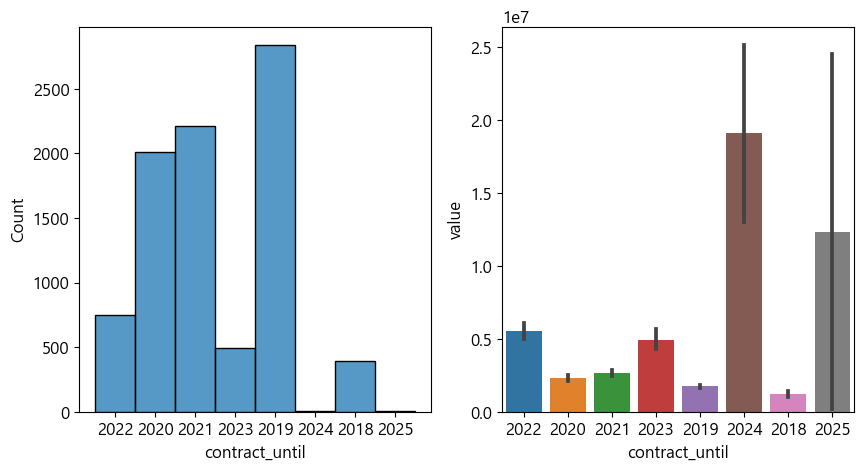

In [189]:
f,ax = plt.subplots(1,2)
sns.histplot(x='contract_until',data=train,ax=ax[0])
sns.barplot(x='contract_until',data=train,y='value',ax=ax[1])

In [190]:
train['contract_until'] = train['contract_until'].astype(int)


C:\Users\hamin\AppData\Local\Temp\ipykernel_3096\3730835277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['contract_until'] = train['contract_until'].astype(int)


계약만료가지 남은 기간으로 수정

In [191]:
train['contract_until'] = train['contract_until'] - 2018
train['contract_until'].value_counts()

C:\Users\hamin\AppData\Local\Temp\ipykernel_3096\514858213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['contract_until'] = train['contract_until'] - 2018


contract_until
1    2838
3    2214
2    2013
4     750
5     496
0     392
6       9
7       2
Name: count, dtype: int64

### 포지션

[Text(0.5, 1.0, '포지션- 이적료 로그화 막대그래프')]

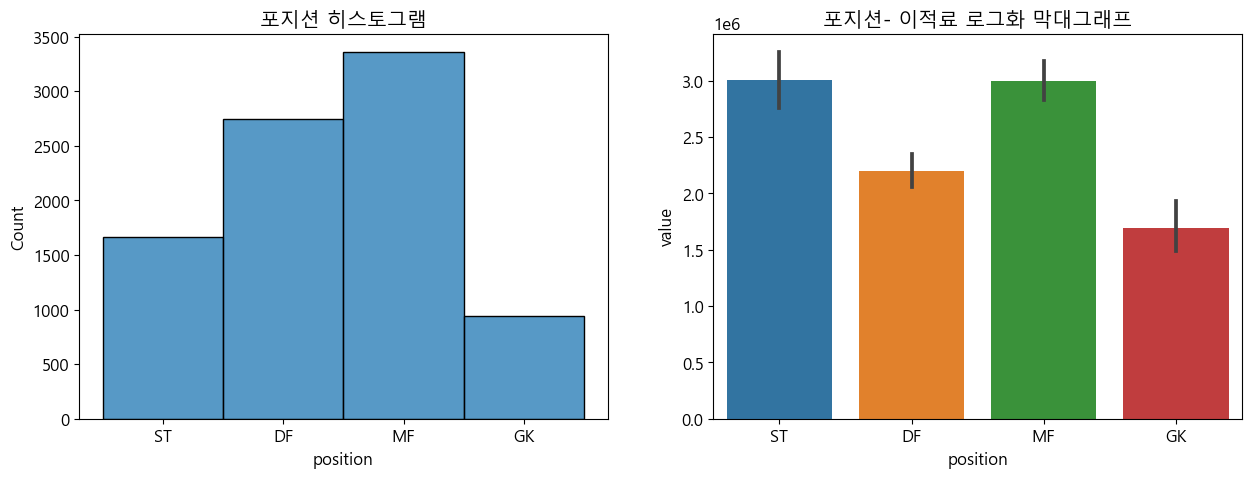

In [192]:
f,ax = plt.subplots(1,2,figsize=(15,5))

sns.histplot(x='position',data=train,ax=ax[0])
ax[0].set(title='포지션 히스토그램')

sns.barplot(x='position',data=train,y='value',ax=ax[1])
ax[1].set(title='포지션- 이적료 로그화 막대그래프')


### 로그화 민맥스 standard + 종속변수 그래도 시각화 해서 차이가 하나라도 있으면 차이가 잇다고 봐도됌


[Text(0.5, 1.0, '주발 - 로그화 이적료 막대그래프')]

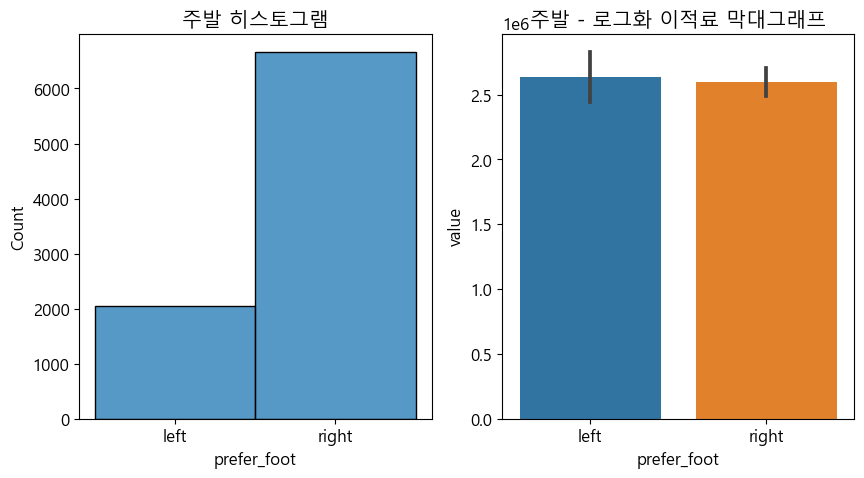

In [193]:
f,ax =plt.subplots(1,2)
sns.histplot(x='prefer_foot',data=train,ax=ax[0])
ax[0].set(title='주발 히스토그램')

sns.barplot(x='prefer_foot',data=train,y='value',ax=ax[1])
ax[1].set(title='주발 - 로그화 이적료 막대그래프')

### 인기 

[Text(0.5, 1.0, '인기 - 로그화 이적료 막대그래프')]

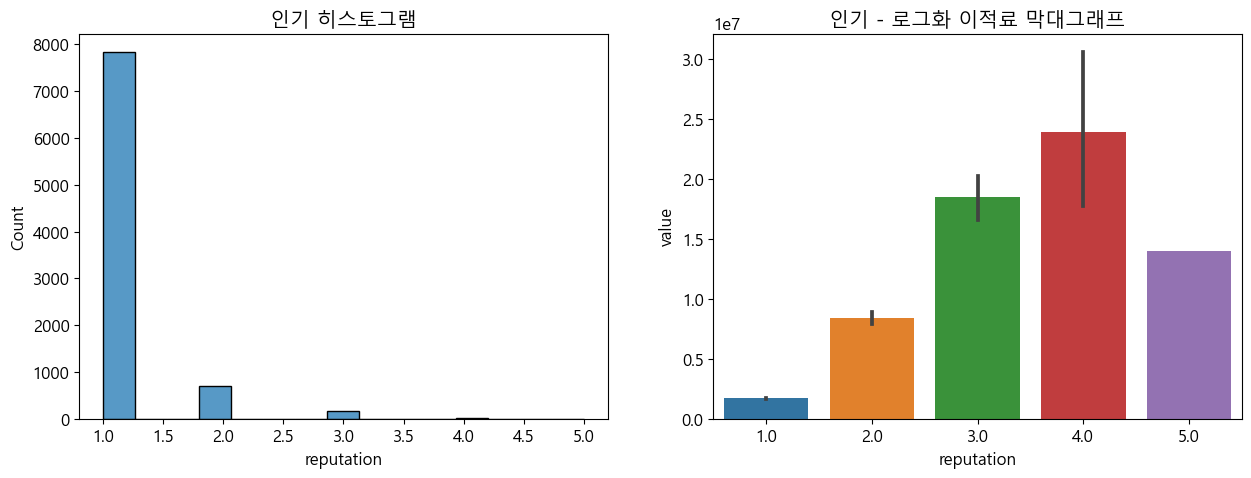

In [194]:
f,ax = plt.subplots(1,2,figsize=(15,5))

sns.histplot(x='reputation',data=train,ax=ax[0])
ax[0].set(title='인기 히스토그램')

sns.barplot(x='reputation',data=train,ax=ax[1],y='value')
ax[1].set(title='인기 - 로그화 이적료 막대그래프')

In [195]:
train.head()

,continent,contract_until,position,prefer_foot,reputation,stat_skill_moves,value,age_range,log_stat_overall,log_stat_potential,log_ratio
27,europe,4,ST,left,3.0,3.0,62500000.0,20~26세,4.477337,4.499810,0.681848
28,europe,2,DF,left,3.0,3.0,38000000.0,26~32세,4.477337,4.477337,0.693147
29,europe,2,ST,right,3.0,4.0,45000000.0,26~32세,4.477337,4.477337,0.693147
30,europe,2,MF,right,3.0,3.0,46500000.0,26~32세,4.477337,4.477337,0.693147
31,europe,3,MF,right,4.0,3.0,46500000.0,26~32세,4.477337,4.477337,0.693147


In [196]:
train['prefer_foot'].value_counts()

prefer_foot
right    6662
left     2052
Name: count, dtype: int64

## 최종 독립변수

- continent
- contract_until
- position
- reputaion
- stat_skill_moves
- log_stat_overall
- log_stat_potential
- log_ratio

## 종속변수 
- log_value

In [197]:
train.head()

,continent,contract_until,position,prefer_foot,reputation,stat_skill_moves,value,age_range,log_stat_overall,log_stat_potential,log_ratio
27,europe,4,ST,left,3.0,3.0,62500000.0,20~26세,4.477337,4.499810,0.681848
28,europe,2,DF,left,3.0,3.0,38000000.0,26~32세,4.477337,4.477337,0.693147
29,europe,2,ST,right,3.0,4.0,45000000.0,26~32세,4.477337,4.477337,0.693147
30,europe,2,MF,right,3.0,3.0,46500000.0,26~32세,4.477337,4.477337,0.693147
31,europe,3,MF,right,4.0,3.0,46500000.0,26~32세,4.477337,4.477337,0.693147


### 스케일링


In [198]:
num_final_col

['log_stat_overall', 'log_stat_potential', 'log_ratio']

In [199]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
train.loc[:,num_final_col] = scaler.fit_transform(train.loc[:,num_final_col])
train.loc[:,num_final_col].head() 


,log_stat_overall,log_stat_potential,log_ratio
27,2.718183,2.702797,0.612263
28,2.718183,2.416230,0.925832
29,2.718183,2.416230,0.925832
30,2.718183,2.416230,0.925832
31,2.718183,2.416230,0.925832


### test 데이터에 적용


In [200]:
test.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,europe,2022,ST,right,5.0,94,94,5.0
1,26,south america,2022,ST,right,5.0,92,93,5.0
2,27,europe,2023,MF,right,4.0,91,92,4.0
3,27,europe,2020,ST,right,4.0,91,91,4.0
4,32,europe,2020,MF,right,4.0,91,91,4.0


In [201]:
test.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,europe,2022,ST,right,5.0,94,94,5.0
1,26,south america,2022,ST,right,5.0,92,93,5.0
2,27,europe,2023,MF,right,4.0,91,92,4.0
3,27,europe,2020,ST,right,4.0,91,91,4.0
4,32,europe,2020,MF,right,4.0,91,91,4.0


### test 데이터 전처리


In [202]:
## 나이 범주화
test['age_range'] = test['age']
test.loc[test['age']<20,'age_range'] = '20세이하'
test.loc[(test['age']>=20)&(test['age']<26),'age_range'] = '20~26세'
test.loc[(test['age']>=26)&(test['age']<32),'age_range'] = '26~32세'
test.loc[(test['age']>=32)&(test['age']<38),'age_range'] = '32~38세'
test.loc[(test['age']>=38),'age_range'] = '38세 이상'

test.head()


,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,age_range
0,33,europe,2022,ST,right,5.0,94,94,5.0,32~38세
1,26,south america,2022,ST,right,5.0,92,93,5.0,26~32세
2,27,europe,2023,MF,right,4.0,91,92,4.0,26~32세
3,27,europe,2020,ST,right,4.0,91,91,4.0,26~32세
4,32,europe,2020,MF,right,4.0,91,91,4.0,32~38세


In [203]:
##비율화
test['ratio'] = test['stat_overall']/test['stat_potential']

test.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,age_range,ratio
0,33,europe,2022,ST,right,5.0,94,94,5.0,32~38세,1.000000
1,26,south america,2022,ST,right,5.0,92,93,5.0,26~32세,0.989247
2,27,europe,2023,MF,right,4.0,91,92,4.0,26~32세,0.989130
3,27,europe,2020,ST,right,4.0,91,91,4.0,26~32세,1.000000
4,32,europe,2020,MF,right,4.0,91,91,4.0,32~38세,1.000000


In [204]:
## 로그화 
test['log_stat_overall'] = np.log1p(test.loc[:,'stat_overall'])
test['log_stat_potential'] = np.log1p(test.loc[:,'stat_potential'])
test['log_ratio'] = np.log1p(test.loc[:,'ratio'])


test.head()




,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,age_range,ratio,log_stat_overall,log_stat_potential,log_ratio
0,33,europe,2022,ST,right,5.0,94,94,5.0,32~38세,1.000000,4.553877,4.553877,0.693147
1,26,south america,2022,ST,right,5.0,92,93,5.0,26~32세,0.989247,4.532599,4.543295,0.687756
2,27,europe,2023,MF,right,4.0,91,92,4.0,26~32세,0.989130,4.521789,4.532599,0.687698
3,27,europe,2020,ST,right,4.0,91,91,4.0,26~32세,1.000000,4.521789,4.521789,0.693147
4,32,europe,2020,MF,right,4.0,91,91,4.0,32~38세,1.000000,4.521789,4.521789,0.693147


In [205]:
## 이상치 log_stat_overall
overall_first = test['log_stat_overall'].quantile(0.25)
overall_third = test['log_stat_overall'].quantile(0.75)
IQR_ov = overall_third - overall_first
test = test.loc[(test['log_stat_overall']>=overall_first - 1.5 *IQR_ov) &(test['log_stat_overall']<=overall_third + 1.5 *IQR_ov),:]
test


,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,age_range,ratio,log_stat_overall,log_stat_potential,log_ratio
16,25,south america,2021,ST,right,3.0,87,90,3.0,20~26세,0.966667,4.477337,4.510860,0.676340
17,28,europe,2023,ST,right,3.0,87,87,3.0,26~32세,1.000000,4.477337,4.477337,0.693147
18,31,europe,2019,DF,left,3.0,87,87,3.0,26~32세,1.000000,4.477337,4.477337,0.693147
19,22,europe,2021,ST,left,2.0,86,92,4.0,20~26세,0.934783,4.465908,4.532599,0.659995
20,23,europe,2022,ST,left,2.0,86,91,4.0,20~26세,0.945055,4.465908,4.521789,0.665290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,19,europe,2020,DF,right,1.0,52,68,2.0,20세이하,0.764706,3.970292,4.234107,0.567984
3792,18,europe,2019,GK,right,1.0,52,62,1.0,20세이하,0.838710,3.970292,4.143135,0.609064
3793,21,asia,2021,MF,left,1.0,52,61,3.0,20~26세,0.852459,3.970292,4.127134,0.616514
3794,16,europe,2020,MF,right,1.0,52,67,2.0,20세이하,0.776119,3.970292,4.219508,0.574431


In [206]:
## 이상치 log_stat_potential
po_overall_first = test['log_stat_potential'].quantile(0.25)
po_overall_third = test['log_stat_potential'].quantile(0.75)
IQR_po = po_overall_third - po_overall_first
test = test.loc[(test['log_stat_potential']>=po_overall_first - 1.5 *IQR_po) &(test['log_stat_potential']<=po_overall_third + 1.5 *IQR_po),:]
test


,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,age_range,ratio,log_stat_overall,log_stat_potential,log_ratio
17,28,europe,2023,ST,right,3.0,87,87,3.0,26~32세,1.000000,4.477337,4.477337,0.693147
18,31,europe,2019,DF,left,3.0,87,87,3.0,26~32세,1.000000,4.477337,4.477337,0.693147
22,26,south america,2023,MF,right,3.0,86,87,4.0,26~32세,0.988506,4.465908,4.477337,0.687383
24,28,europe,2022,DF,right,3.0,86,86,2.0,26~32세,1.000000,4.465908,4.465908,0.693147
25,31,europe,2023,DF,right,3.0,86,86,2.0,26~32세,1.000000,4.465908,4.465908,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,19,europe,2020,DF,right,1.0,52,68,2.0,20세이하,0.764706,3.970292,4.234107,0.567984
3792,18,europe,2019,GK,right,1.0,52,62,1.0,20세이하,0.838710,3.970292,4.143135,0.609064
3793,21,asia,2021,MF,left,1.0,52,61,3.0,20~26세,0.852459,3.970292,4.127134,0.616514
3794,16,europe,2020,MF,right,1.0,52,67,2.0,20세이하,0.776119,3.970292,4.219508,0.574431


In [207]:
ratio_first = test['log_ratio'].quantile(0.25)
ratio_third = test['log_ratio'].quantile(0.75)

IQR_ratio = ratio_third - ratio_first
test = test.loc[(train['log_ratio']>=ratio_first - 1.5 *IQR_ratio) &(test['log_ratio']<=ratio_third + 1.5 *IQR_ratio),:]
test


,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,age_range,ratio,log_stat_overall,log_stat_potential,log_ratio
27,29,europe,2021,MF,left,4.0,86,86,4.0,26~32세,1.000000,4.465908,4.465908,0.693147
28,24,europe,2020,MF,left,3.0,85,89,4.0,20~26세,0.955056,4.454347,4.499810,0.670419
29,23,europe,2023,MF,right,3.0,85,88,3.0,20~26세,0.965909,4.454347,4.488636,0.675955
30,27,africa,2023,ST,left,3.0,85,85,5.0,26~32세,1.000000,4.454347,4.454347,0.693147
31,26,europe,2021,DF,left,4.0,85,87,3.0,26~32세,0.977011,4.454347,4.477337,0.681586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,19,south america,2020,ST,right,1.0,52,64,3.0,20세이하,0.812500,3.970292,4.174387,0.594707
3780,19,south america,2021,MF,right,1.0,52,68,2.0,20세이하,0.764706,3.970292,4.234107,0.567984
3782,19,europe,2020,ST,right,1.0,52,68,2.0,20세이하,0.764706,3.970292,4.234107,0.567984
3789,19,asia,2021,GK,right,1.0,52,68,1.0,20세이하,0.764706,3.970292,4.234107,0.567984


In [208]:
### 남은 계약기간
test.loc[test['contract_until']=='Jan 12, 2019','contract_until'] = '2018'
test.loc[test['contract_until']=='May 31, 2020','contract_until'] = '2020'
test.loc[test['contract_until']=='Jan 1, 2019','contract_until'] = '2018'
test.loc[test['contract_until']=='Jun 30, 2020','contract_until'] = '2020'
test.loc[test['contract_until']=='Jan 31, 2019','contract_until'] = '2018'
test.loc[test['contract_until']=='May 31, 2019','contract_until'] = '2019'
test.loc[test['contract_until']=='Jun 30, 2019','contract_until'] = '2019'
test.loc[test['contract_until']=='Dec 31, 2018','contract_until'] = '2018'
test.loc[test['contract_until']=='Dec 31, 2019','contract_until'] = '2019'
test.loc[test['contract_until']=='Jun 1, 2019','contract_until'] = '2019'


test['contract_until'] = test['contract_until'].astype(int)

test['contract_until'] = test['contract_until'] - 2018
test['contract_until'].value_counts()



C:\Users\hamin\AppData\Local\Temp\ipykernel_3096\2280972906.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['contract_until'] = test['contract_until'].astype(int)
C:\Users\hamin\AppData\Local\Temp\ipykernel_3096\2280972906.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['contract_until'] = test['contract_until'] - 2018


contract_until
1    683
3    550
2    532
4    209
5    143
0    114
6      2
8      1
7      1
Name: count, dtype: int64

In [209]:
train.head()

,continent,contract_until,position,prefer_foot,reputation,stat_skill_moves,value,age_range,log_stat_overall,log_stat_potential,log_ratio
27,europe,4,ST,left,3.0,3.0,62500000.0,20~26세,2.718183,2.702797,0.612263
28,europe,2,DF,left,3.0,3.0,38000000.0,26~32세,2.718183,2.416230,0.925832
29,europe,2,ST,right,3.0,4.0,45000000.0,26~32세,2.718183,2.416230,0.925832
30,europe,2,MF,right,3.0,3.0,46500000.0,26~32세,2.718183,2.416230,0.925832
31,europe,3,MF,right,4.0,3.0,46500000.0,26~32세,2.718183,2.416230,0.925832


[Text(0.5, 1.0, '주발 - 로그화 이적료 막대그래프')]

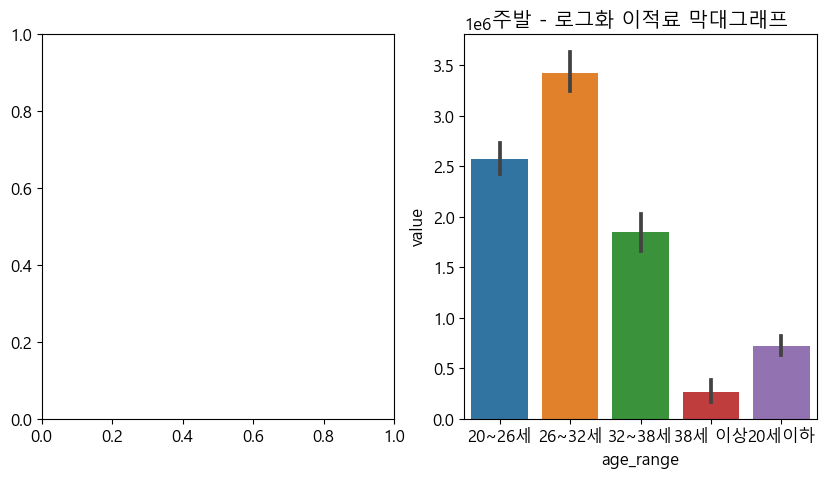

In [210]:
f,ax =plt.subplots(1,2)

sns.barplot(x='age_range',data=train,y='value',ax=ax[1])
ax[1].set(title='주발 - 로그화 이적료 막대그래프')

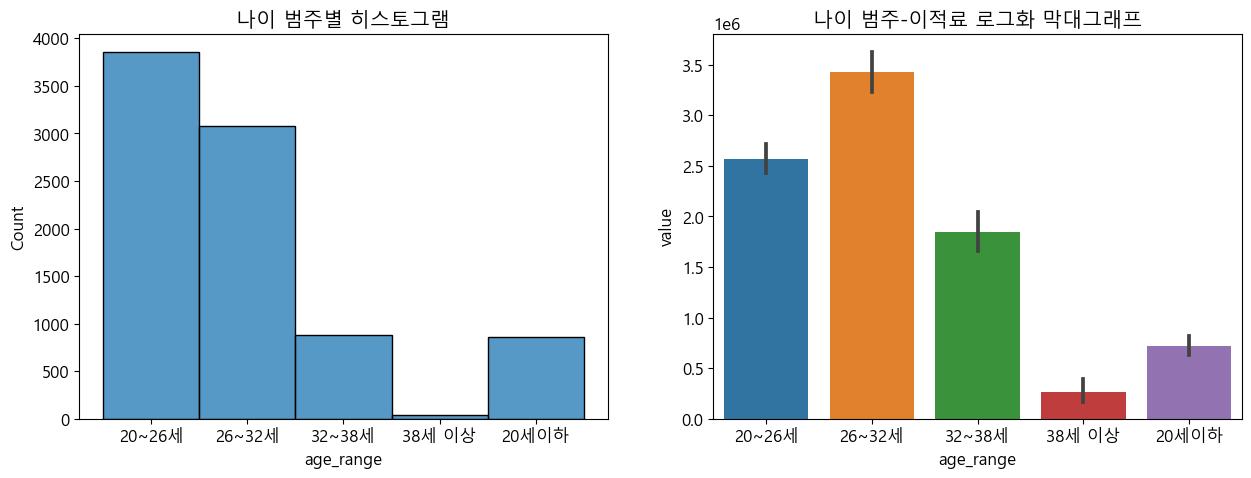

In [211]:
f,ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(x='age_range',data=train,ax=ax[0])
ax[0].set(title='나이 범주별 히스토그램')
sns.barplot(x='age_range',data=train,y='value')
ax[1].set(title='나이 범주-이적료 로그화 막대그래프')
plt.show()

### 주발뺴기

In [212]:
train.head()

,continent,contract_until,position,prefer_foot,reputation,stat_skill_moves,value,age_range,log_stat_overall,log_stat_potential,log_ratio
27,europe,4,ST,left,3.0,3.0,62500000.0,20~26세,2.718183,2.702797,0.612263
28,europe,2,DF,left,3.0,3.0,38000000.0,26~32세,2.718183,2.416230,0.925832
29,europe,2,ST,right,3.0,4.0,45000000.0,26~32세,2.718183,2.416230,0.925832
30,europe,2,MF,right,3.0,3.0,46500000.0,26~32세,2.718183,2.416230,0.925832
31,europe,3,MF,right,4.0,3.0,46500000.0,26~32세,2.718183,2.416230,0.925832


In [213]:
train =train.drop('prefer_foot',axis=1)
test =test.drop('prefer_foot',axis=1)

In [214]:
test = test.drop(['age','stat_overall','stat_potential','ratio'],axis=1)
test

,continent,contract_until,position,reputation,stat_skill_moves,age_range,log_stat_overall,log_stat_potential,log_ratio
27,europe,3,MF,4.0,4.0,26~32세,4.465908,4.465908,0.693147
28,europe,2,MF,3.0,4.0,20~26세,4.454347,4.499810,0.670419
29,europe,5,MF,3.0,3.0,20~26세,4.454347,4.488636,0.675955
30,africa,5,ST,3.0,5.0,26~32세,4.454347,4.454347,0.693147
31,europe,3,DF,4.0,3.0,26~32세,4.454347,4.477337,0.681586
...,...,...,...,...,...,...,...,...,...
3778,south america,2,ST,1.0,3.0,20세이하,3.970292,4.174387,0.594707
3780,south america,3,MF,1.0,2.0,20세이하,3.970292,4.234107,0.567984
3782,europe,2,ST,1.0,2.0,20세이하,3.970292,4.234107,0.567984
3789,asia,3,GK,1.0,1.0,20세이하,3.970292,4.234107,0.567984


In [215]:
scaler = StandardScaler()

test.loc[:,'log_stat_overall'] = scaler.fit_transform(test.loc[:,['log_stat_overall']])
test.loc[:,'log_stat_potential'] = scaler.fit_transform(test.loc[:,['log_stat_potential']])
test.loc[:,'log_ratio'] = scaler.fit_transform(test.loc[:,['log_ratio']])




In [216]:
test.head()

,continent,contract_until,position,reputation,stat_skill_moves,age_range,log_stat_overall,log_stat_potential,log_ratio
27,europe,3,MF,4.0,4.0,26~32세,2.515283,2.191892,0.884561
28,europe,2,MF,3.0,4.0,20~26세,2.392521,2.620290,0.235488
29,europe,5,MF,3.0,3.0,20~26세,2.392521,2.479098,0.393580
30,africa,5,ST,3.0,5.0,26~32세,2.392521,2.045803,0.884561
31,europe,3,DF,4.0,3.0,26~32세,2.392521,2.336311,0.554407


### x,y 분리

In [217]:
y_train = train[['value']]
x_train = train.drop('value',axis=1)
x_train.head()

,continent,contract_until,position,reputation,stat_skill_moves,age_range,log_stat_overall,log_stat_potential,log_ratio
27,europe,4,ST,3.0,3.0,20~26세,2.718183,2.702797,0.612263
28,europe,2,DF,3.0,3.0,26~32세,2.718183,2.416230,0.925832
29,europe,2,ST,3.0,4.0,26~32세,2.718183,2.416230,0.925832
30,europe,2,MF,3.0,3.0,26~32세,2.718183,2.416230,0.925832
31,europe,3,MF,4.0,3.0,26~32세,2.718183,2.416230,0.925832


In [218]:
x_train.head()

,continent,contract_until,position,reputation,stat_skill_moves,age_range,log_stat_overall,log_stat_potential,log_ratio
27,europe,4,ST,3.0,3.0,20~26세,2.718183,2.702797,0.612263
28,europe,2,DF,3.0,3.0,26~32세,2.718183,2.416230,0.925832
29,europe,2,ST,3.0,4.0,26~32세,2.718183,2.416230,0.925832
30,europe,2,MF,3.0,3.0,26~32세,2.718183,2.416230,0.925832
31,europe,3,MF,4.0,3.0,26~32세,2.718183,2.416230,0.925832


In [219]:
test.head()

,continent,contract_until,position,reputation,stat_skill_moves,age_range,log_stat_overall,log_stat_potential,log_ratio
27,europe,3,MF,4.0,4.0,26~32세,2.515283,2.191892,0.884561
28,europe,2,MF,3.0,4.0,20~26세,2.392521,2.620290,0.235488
29,europe,5,MF,3.0,3.0,20~26세,2.392521,2.479098,0.393580
30,africa,5,ST,3.0,5.0,26~32세,2.392521,2.045803,0.884561
31,europe,3,DF,4.0,3.0,26~32세,2.392521,2.336311,0.554407


In [220]:
x_train = x_train.drop('log_ratio',axis=1)


In [221]:

y_train.head()

,value
27,62500000.0
28,38000000.0
29,45000000.0
30,46500000.0
31,46500000.0


In [222]:
x_test = test.copy()
x_test.head()

,continent,contract_until,position,reputation,stat_skill_moves,age_range,log_stat_overall,log_stat_potential,log_ratio
27,europe,3,MF,4.0,4.0,26~32세,2.515283,2.191892,0.884561
28,europe,2,MF,3.0,4.0,20~26세,2.392521,2.620290,0.235488
29,europe,5,MF,3.0,3.0,20~26세,2.392521,2.479098,0.393580
30,africa,5,ST,3.0,5.0,26~32세,2.392521,2.045803,0.884561
31,europe,3,DF,4.0,3.0,26~32세,2.392521,2.336311,0.554407


In [223]:
x_test = x_test.drop('log_ratio',axis=1)

### 더미변수 ㄱㄱ 


In [224]:
x_train = pd.get_dummies(x_train,drop_first=True,dtype='int')
x_test = pd.get_dummies(x_test,drop_first= True, dtype='int')
print(x_train.shape)
print(x_test.shape)

(8714, 16)
(2235, 16)


## 모델링

### 선형회귀 모델


In [225]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val =train_test_split(x_train,y_train,test_size=0.3,shuffle = 3 , random_state = 12)

C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


In [226]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_tr,y_tr)



LinearRegression()

In [227]:
## 평가
from sklearn.metrics import mean_squared_error
y_tr_pred = lr.predict(x_tr)
tr_mse = mean_squared_error(y_tr,y_tr_pred)

y_val_pred = lr.predict(x_val)
val_mse = mean_squared_error(y_val,y_val_pred)

tr_rmse = np.sqrt(tr_mse)
val_rmse = np.sqrt(val_mse)


print("Tr MSE:%3f" % tr_rmse)
print("Val MSE: %3f" % val_rmse)


Tr MSE:2742767.606013
Val MSE: 2805225.586516


In [228]:
# cross_val_score 함수
from sklearn.model_selection import cross_val_score

mse_score = -1*cross_val_score(lr,x_tr,y_tr,cv=5,scoring='neg_mean_squared_error')
print("개별 Fold의 MSE:", np.sqrt(np.round(mse_score, 4)))
print("평균 MSE:%4f" % np.sqrt(np.mean(mse_score)))

개별 Fold의 MSE: [2632488.65612073 2827651.57974316 2569596.08616207 2854706.94257536
 2884246.03810813]
평균 MSE:2756688.628169


In [229]:
x_tr.head()

,contract_until,reputation,stat_skill_moves,log_stat_overall,log_stat_potential,continent_asia,continent_europe,continent_oceania,continent_south america,position_GK,position_MF,position_ST,age_range_20세이하,age_range_26~32세,age_range_32~38세,age_range_38세 이상
519,3,3.0,3.0,1.580821,1.200865,0,1,0,0,0,1,0,0,1,0,0
5306,1,1.0,3.0,-0.156023,-1.060441,0,1,0,0,0,0,0,0,1,0,0
7788,1,1.0,2.0,-1.145057,-1.644590,0,0,0,0,0,1,0,0,0,0,0
4953,1,1.0,3.0,-0.156023,-1.060441,0,1,0,0,0,1,0,0,1,0,0
8137,1,1.0,2.0,-1.496488,-2.467565,0,0,0,0,0,0,0,0,1,0,0


### 다항식 

In [230]:
# numeric_col = ['log_stat_overall','log_stat_potential','log_ratio']


In [231]:
# cat_col = ['contract_until', 'reputation', 'stat_skill_moves',  'continent_asia', 'continent_europe',
#        'continent_oceania', 'continent_south america', 'position_GK',
#        'position_MF', 'position_ST', 'age_range_20세이하', 'age_range_26~32세',
#        'age_range_32~38세', 'age_range_38세 이상']

In [232]:
# from sklearn.preprocessing import PolynomialFeatures
# pf = PolynomialFeatures(degree=2)

# x_tr_poly= pf.fit_transform(x_tr[numeric_col])
# x_tr_poly = pd.DataFrame(x_tr_poly,columns=pf.get_feature_names_out()).drop('1',axis=1)
# x_tr_poly[cat_col] = x_tr[cat_col]


In [233]:
# x_tr_poly.shape

In [234]:
# x_tr['continent_europe'].unique()

### ridge 

In [235]:
from sklearn.linear_model import Ridge
rdg = Ridge(alpha = 2.5)
rdg.fit(x_tr,y_tr)

y_tr_pred=  rdg.predict(x_tr)
tr_mse = mean_squared_error(y_tr,y_tr_pred)

tr_rmse = np.sqrt(tr_mse)
val_rmse = np.sqrt(val_mse)


print("Tr MSE:%3f" % tr_rmse)
print("Val MSE: %3f" % val_rmse)




Tr MSE:2742939.114809
Val MSE: 2805225.586516


In [236]:
# Lasso(L1 규제)
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.05)
las.fit(x_tr,y_tr)

y_tr_pred = las.predict(x_tr)
tr_mse = mean_squared_error(y_tr,y_tr_pred)


y_val_pred = las.predict(x_val)
val_mse = mean_squared_error(y_val,y_val_pred)


tr_rmse = np.sqrt(tr_mse)
val_rmse = np.sqrt(val_mse)


print("Tr MSE:%3f" % tr_rmse)
print("Val MSE: %3f" % val_rmse)

Tr MSE:2742767.606014
Val MSE: 2805225.554840


In [237]:
# ElasticNet 알고리즘은 L2규제와 L1규제를 모두 적용한 선형 회귀 모델이다.
# ElasticNet의 알파 값은 L2규제 강도와 L1규제 강도의 합이다. 
# l1-ratio 옵션은 L1 규제 강도의 상대적 비율을 조정한다.
# l1_ratio가 0이면 L2규제와 같고, l1_ratio이 1이면 L1규제와 같다.

In [238]:
# ElasticNet(L2/L1 규제)

from sklearn.linear_model import ElasticNet
ela = ElasticNet(alpha=0.1,l1_ratio = 0.7)
ela.fit(x_tr,y_tr)

y_tr_pred =ela.predict(x_tr)
tr_mse = mean_squared_error(y_tr,y_tr_pred)

y_val_pred = ela.predict(x_val)
val_mse = mean_squared_error(y_val,y_val_pred)

tr_rmse = np.sqrt(tr_mse)
val_rmse = np.sqrt(val_mse)


print("Tr MSE:%3f" % tr_rmse)
print("Val MSE: %3f" % val_rmse)


Tr MSE:2787417.523909
Val MSE: 2862685.990798


#### 트리기반 모델 - 비선형 회귀 

In [239]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 3, random_state=123)
dtr.fit(x_tr,y_tr)

y_tr_pred = dtr.predict(x_tr)
tr_mse = mean_squared_error(y_tr,y_tr_pred)

y_val_pred = dtr.predict(x_val)
val_mse = mean_squared_error(y_val,y_val_pred)

tr_rmse = np.sqrt(tr_mse)
val_rmse = np.sqrt(val_mse)


print("Tr MSE:%3f" % tr_rmse)
print("Val MSE: %3f" % val_rmse)

Tr MSE:1469809.729608
Val MSE: 1726837.731177


#### 랜덤포레스트

In [240]:
# 랜덤 포레스트
# 랜덤 포레스트는 하나의 트리를 사용하는 의사결정나무에 비하여 
# 여러 개의 트리 모델이 예측 한 값을 종합하기 떄문에 전체 예측력을 높일 수 있다.
# 약간의 과대적합된 경향이 있다.

In [241]:
# 랜덤포레스트 
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 3 , random_state=123)
rf.fit(x_tr,y_tr)

y_tr_pred = rf.predict(x_tr)
tr_mse = mean_squared_error(y_tr,y_tr_pred)

y_val_pred = rf.predict(x_val)
val_mse = mean_squared_error(y_val,y_val_pred)


tr_rmse = np.sqrt(tr_mse)
val_rmse = np.sqrt(val_mse)


print("Tr MSE:%3f" % tr_rmse)
print("Val MSE: %3f" % val_rmse)

C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Tr MSE:1278875.000745
Val MSE: 1509335.921156


In [242]:
# XGBoost
from xgboost import XGBRegressor
xgbr = XGBRegressor(objective='reg:squarederror', max_depth=3, random_state=12)
xgbr.fit(x_tr, y_tr)

y_tr_pred = xgbr.predict(x_tr)
tr_mse = mean_squared_error(y_tr, y_tr_pred)

y_val_pred = xgbr.predict(x_val)
val_mse = mean_squared_error(y_val, y_val_pred)



tr_rmse = np.sqrt(tr_mse)
val_rmse = np.sqrt(val_mse)


print("Tr MSE:%3f" % tr_rmse)
print("Val MSE: %3f" % val_rmse)

Tr MSE:409565.109630
Val MSE: 749908.590927
